#Продвинутый Python, ДЗ-3

Правила игры:

В домашке 8 задач, разбаловка указана в задании. Суммарно за дз можно получить 100 баллов, что равняется 10 баллам

Дедлайн - 7 дней после выдачи дз. Необходимо залить решеннный ноутбук в github и прислать ссылку в Anytask (без выполнения любого из пунктов работа проверяться не будет)

В данной домашке нужно рисовать графики с помощью matplotlib или же seaborn. Обратите внимание, что все графики и оси должны быть подписаны, графики должны выглядеть аккуратно (за это будем штрафовать)

## Данные

В этом домашнем задании вам придется оказаться на месте аналитика в бразильском маркетплейсе [Olist](https://olist.com/pt-br/). Вам необходимо исследовать данные и на их основании сделать выводы, которые помогут бизнесу расцветать!

Данные находятся тут в файле archive.zip

In [2]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=e3539cfb365b6834c262cc1cedc3410a5cbd6ba2c87e822b8b1906c2b73f3ee5
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import wget

url = 'https://github.com/Palladain/Deep_Python/raw/main/Homeworks/Homework_1/archive.zip'
filename = wget.download(url)

with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('./')

customers = pd.read_csv('olist_customers_dataset.csv')
location = pd.read_csv('olist_geolocation_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
translation = pd.read_csv('product_category_name_translation.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')

Ван дано 9 датасетов, которые содержат в себе все данные по 100 000 заказам со всей Бразилии. Чтобы облегчить вам жизнь, вот связи по этим датасетам (файл product_category_name_translation является переводом названий категорий с португальского на английский)

![](https://i.imgur.com/HRhd2Y0.png)

Ну что же, начнем!

## Задание 1 (20 баллов)

Визуализируйте зависимость между средним числом покупок товара и:

* числом фотографий товара

* кол-во символов в описании товара (аггрегируйте с шагом 20)

* кол-во символов в названии (аггрегируйте с шагом 5)

Для подсчета среднего числа покупок нужно посчитать по каждому товару число продаж, а затем взять среднее от него (учтите, что мы считаем только доставленные заказы)

# История такая, пока я делал это дз - мне показалось, что я сильно большо работал с пандасом и мало работал с графиками, поэтому последние 4 часа я занимался украшательством - прошу оценить мои труды эстетически

In [106]:
plt.style.use('ggplot')

In [107]:
products.columns


Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [108]:
products.product_photos_qty.unique()

array([ 1.,  4.,  2.,  3.,  5.,  9.,  6., nan,  7., 12., 10., 11., 17.,
        8., 15., 13., 14., 20., 18., 19.])

Text(0.5, 1.0, 'Покупки/Название')

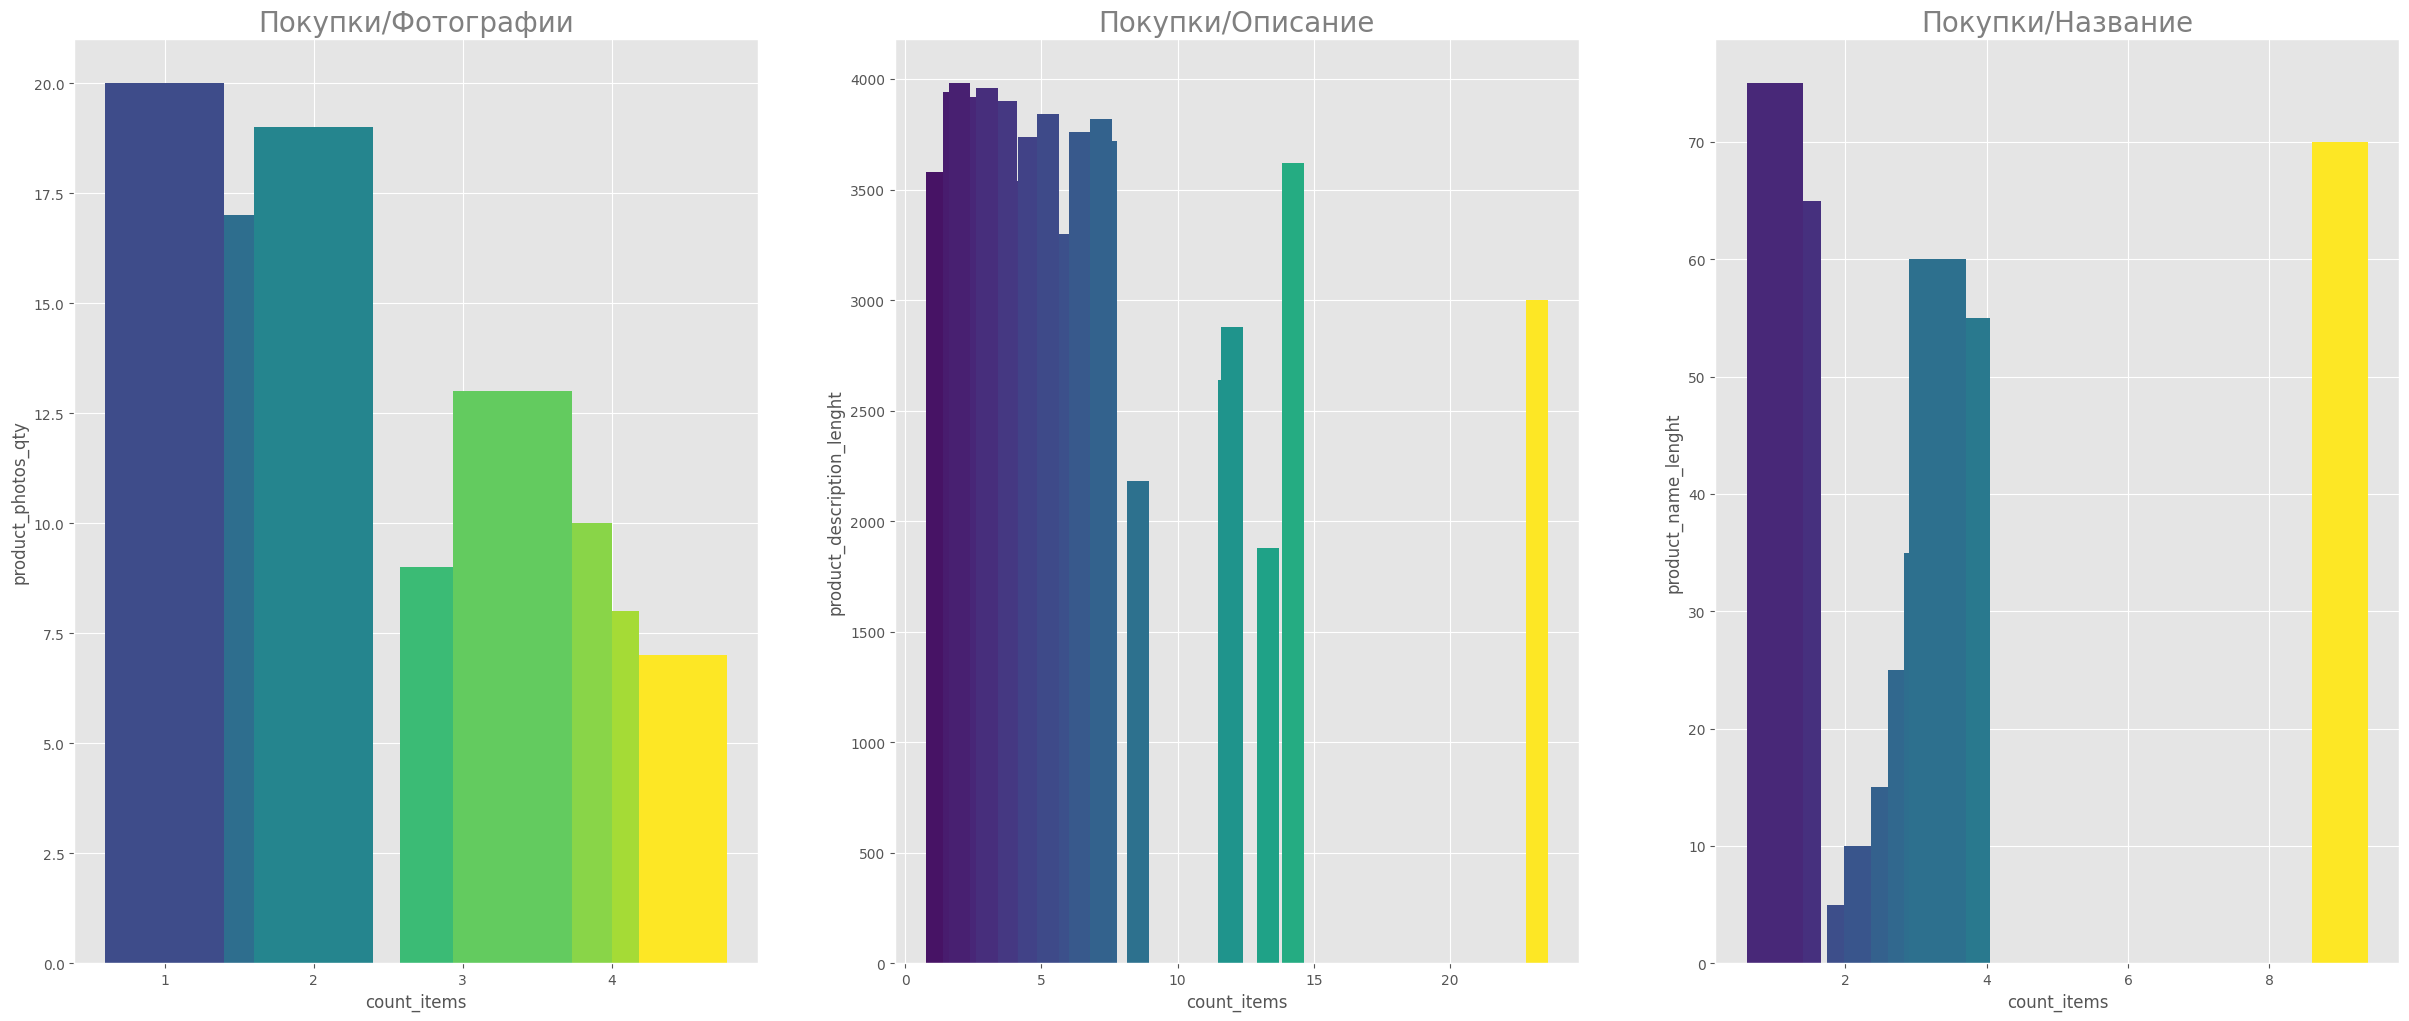

In [128]:
# Аккуратно смерджим
merged_data_photos = pd.merge(
    products[['product_id', 'product_photos_qty', 'product_description_lenght', 'product_name_lenght']],
    items[['order_id', 'product_id']])

merged_data_photos=pd.merge(products, merged_data_photos.groupby('product_id')['order_id'].count().reset_index())
merged_data_photos_1 = merged_data_photos.groupby('product_photos_qty')['order_id'].mean().reset_index()

merged_data_photos['product_description_lenght']=merged_data_photos['product_description_lenght'].apply(lambda x: (x //20) * 20)
merged_data_desc = merged_data_photos.groupby('product_description_lenght')['order_id'].mean().reset_index()

merged_data_photos['product_name_lenght']=merged_data_photos['product_name_lenght'].apply(lambda x: (x // 5) * 5)
merged_data_name = merged_data_photos.groupby('product_name_lenght')['order_id'].mean().reset_index()

fig, ax = plt.subplots(1, 3, figsize=(30, 12))
fig.subplots_adjust(hspace=0.33)
ax[0].bar(merged_data_photos_1['order_id'], merged_data_photos_1['product_photos_qty'], color=plt.cm.viridis(merged_data_photos_1['order_id'] / max(merged_data_photos_1['order_id'])))
ax[0].set_ylabel('product_photos_qty')
ax[0].set_xlabel('count_items')
ax[0].set_title('Покупки/Фотографии', fontsize=20, color='gray')

ax[1].bar(merged_data_desc['order_id'], merged_data_desc['product_description_lenght'], color=plt.cm.viridis(merged_data_desc['order_id'] / max(merged_data_desc['order_id'])))
ax[1].set_ylabel('product_description_lenght')
ax[1].set_xlabel('count_items')
ax[1].set_title('Покупки/Описание', fontsize=20, color='gray')

ax[2].bar(merged_data_name['order_id'], merged_data_name['product_name_lenght'], color=plt.cm.viridis(merged_data_name['order_id'] / max(merged_data_name['order_id'])))
ax[2].set_xlabel('count_items')
ax[2].set_ylabel('product_name_lenght')
ax[2].set_title('Покупки/Название', fontsize=20, color='gray')



## Задание 2 (10 баллов)

Отобразите среднюю сумму оплаты по типу оплаты (для этого вам нужна табличка payments)

In [57]:
payments.columns


Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [58]:
payments["payment_type"].nunique()

5

In [59]:
payments["payment_type"]

0         credit_card
1         credit_card
2         credit_card
3         credit_card
4         credit_card
             ...     
103881         boleto
103882    credit_card
103883    credit_card
103884    credit_card
103885         boleto
Name: payment_type, Length: 103886, dtype: object

In [61]:
payments_2=payments.groupby("payment_type")["order_id"].count()
payments_2


payment_type
boleto         19784
credit_card    76795
debit_card      1529
not_defined        3
voucher         5775
Name: order_id, dtype: int64

Text(0, 0.5, 'payment_value')

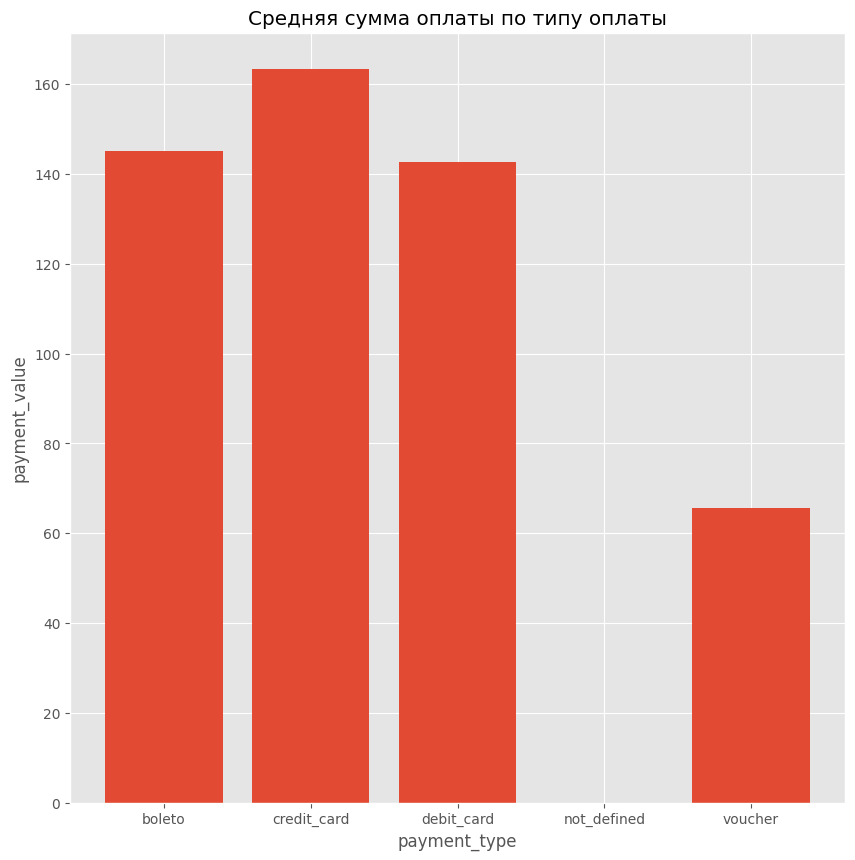

In [129]:
payments_by_type = payments.groupby('payment_type')['payment_value'].mean().reset_index()

#да, мне настолько лень
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Если мне будет не лень, то я наведу красоту
ax.bar(payments_by_type["payment_type"], payments_by_type["payment_value"])
ax.set_title('Средняя сумма оплаты по типу оплаты')
ax.set_xlabel('payment_type')
ax.set_ylabel('payment_value' )
#нас не просили предобрабатывать данные - так что not defined оставим (их 3 всего - видно из анализа выше)


## Задание 3 (25 баллов)

Обратите внимание на число платежей (payment_installments). Выясните, какая сумма оплаты указана: за целую покупку или только за ее часть? (Обратите внимание, что в данных есть определенная бага, которую нужно расследовать и учесть)

Также покажите средний чек в зависимости от числа оплат. Есть ли какая-то связь между ними?

In [68]:
# блин, это весело оказывается
# сначала исследуем как обычно
payments["payment_installments"].nunique()

24

In [70]:
#так, ну очевидно что 24 месяца
payments["payment_installments"]

0         8
1         1
2         1
3         8
4         2
         ..
103881    1
103882    2
103883    1
103884    5
103885    1
Name: payment_installments, Length: 103886, dtype: int64

In [76]:
payments_2=payments.groupby("payment_installments")["payment_type"].unique()
payments_2
# было очевидно, что только по кредитной карте можно платить нескольо раз - до 24 месяцев
# остальное делается за один раз - скорее всего мы нашли баг - 0 раз платить нельзя, посмотрим на них

payment_installments
0                                         [credit_card]
1     [credit_card, boleto, voucher, debit_card, not...
2                                         [credit_card]
3                                         [credit_card]
4                                         [credit_card]
5                                         [credit_card]
6                                         [credit_card]
7                                         [credit_card]
8                                         [credit_card]
9                                         [credit_card]
10                                        [credit_card]
11                                        [credit_card]
12                                        [credit_card]
13                                        [credit_card]
14                                        [credit_card]
15                                        [credit_card]
16                                        [credit_card]
17                         

In [84]:
payments_2=payments.groupby("payment_installments")["payment_sequential"].unique()
payments_2
# это похоже на число оплат - payment_sequential - пригодится к конце задания

payment_installments
0                                                   [2]
1     [1, 2, 4, 5, 3, 8, 6, 7, 10, 11, 17, 19, 27, 1...
2                                                [1, 2]
3                                             [1, 2, 3]
4                                                [1, 2]
5                                                [1, 2]
6                                                [1, 2]
7                                                [1, 2]
8                                                [1, 2]
9                                                   [1]
10                                               [1, 2]
11                                                  [1]
12                                                  [1]
13                                                  [1]
14                                                  [1]
15                                                  [1]
16                                                  [1]
17                         

In [82]:
payments_dirty=payments[payments["payment_installments"]==0]
payments_dirty

,order_id,payment_sequential,payment_type,payment_installments,payment_value
46982,744bade1fcf9ff3f31d860ace076d422,2,credit_card,0,58.69
79014,1a57108394169c0b47d8f876acc9ba2d,2,credit_card,0,129.94


In [91]:
# Я уже немного запутался, так как появился параметр payment_sequential, который тоже должен что-то значить - попробуем обратиться к другому датасету, чтобы проверить цену
# Наверно проще всего сделать в лоб - проверить по всем
average_order_total = items['price'].sum()/items["order_id"].nunique() #цена всего на все заказы
average_order_delivery_total = items['freight_value'].sum()/items["order_id"].nunique() #ну также
payment_order_total = payments['payment_value'].sum()/payments["order_id"].nunique()
print(average_order_total+average_order_delivery_total,payment_order_total )
#очень странная разница - с одной стороны они почти равны - это говорит от том, что payment_value - скорее полная цена
#будем считать что цена полная, а разницу - злостными происками западных спецслужб


160.5776380921493 160.9902666934835


False

In [96]:
items.columns


Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [104]:

items_2=items[items["order_item_id"]==18]
items_2

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
11949,1b15974a0141d54e36626dca3fdc731a,18,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
57314,8272b63d03f5f79c56e9e4120aec44ef,18,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
75120,ab14fdcfbe524636d65ee38360e22ce8,18,9571759451b1d780ee7c15012ea109d4,ce27a3cc3c8cc1ea79d11e561e9bebb6,2017-08-30 14:30:23,98.7,14.44


In [111]:
#выясним что-нибудь для товаров у которых например 2 части оплаты (общее мы уже посчитали и у нас потчти сошлось, попробуем подтвердить на примере)
payments_dirty_2=payments[payments["payment_installments"]==2]
print(payments_dirty_2)

#возьмем первые две
print(items[items['order_id']=='42fdf880ba16b47b59251dd489d4441a'])
print(items[items['order_id']=='40ec2cf5cb1eb0bf1ea2b117552fecb5'])

print(orders[orders['order_id']=='42fdf880ba16b47b59251dd489d4441a'])
print(orders[orders['order_id']=='40ec2cf5cb1eb0bf1ea2b117552fecb5'])

                                order_id  payment_sequential payment_type  \
4       42fdf880ba16b47b59251dd489d4441a                   1  credit_card   
5       298fcdf1f73eb413e4d26d01b25bc1cd                   1  credit_card   
21      4214cda550ece8ee66441f459dc33a8c                   1  credit_card   
26      d0a945f85ba1074b60aac97ade7e240e                   1  credit_card   
27      c39414c195d0f94c9d9c35e7c6ed4f1a                   1  credit_card   
...                                  ...                 ...          ...   
103868  0020262c8a370bd5a174ea6a2a267321                   1  credit_card   
103873  40ec2cf5cb1eb0bf1ea2b117552fecb5                   1  credit_card   
103876  0872d0faafe0cb56e6f2c594cca1522c                   1  credit_card   
103879  c45067032fd84f4cf408730ff5205568                   1  credit_card   
103882  7b905861d7c825891d6347454ea7863f                   1  credit_card   

        payment_installments  payment_value  
4                          2 

In [105]:
# Пробуем поймать багу за руку как дешевку
print(items[items['order_id']=='744bade1fcf9ff3f31d860ace076d422'])
print(items[items['order_id']=='1a57108394169c0b47d8f876acc9ba2d'])
print(orders[orders['order_id']=='1a57108394169c0b47d8f876acc9ba2d'])
# Ну вроде все нормально - цены при суммировании получается как и в payments  - во втором случае заказывают 2 одиноковых товара сразу , так что тоже все нормально

                               order_id  order_item_id  \
51167  744bade1fcf9ff3f31d860ace076d422              1   

                             product_id                         seller_id  \
51167  0cf573090c66bb30ac5e53c82bdb0403  7202e2ba20579a9bd1acb29e61fe71f6   

       shipping_limit_date  price  freight_value  
51167  2018-04-26 12:31:06   45.9          12.79  
                               order_id  order_item_id  \
11589  1a57108394169c0b47d8f876acc9ba2d              1   
11590  1a57108394169c0b47d8f876acc9ba2d              2   

                             product_id                         seller_id  \
11589  db35a562fb6ba63e19fa42a15349dc04  282f23a9769b2690c5dda22e316f9941   
11590  db35a562fb6ba63e19fa42a15349dc04  282f23a9769b2690c5dda22e316f9941   

       shipping_limit_date  price  freight_value  
11589  2018-05-18 16:31:54  41.69          23.28  
11590  2018-05-18 16:31:54  41.69          23.28  
                               order_id                       cust

In [ ]:
# Из человеческих соображений давайте просто исправим 0 на 1 - так нельзя платить 0 частей
# Все остальное - кажется логичным и исправлению не подлжет

In [124]:
payments.loc[payments["payment_installments"]==0, "payment_installments" ]=1
print(payments[payments['order_id']=='744bade1fcf9ff3f31d860ace076d422'])
print(payments[payments['order_id']=='1a57108394169c0b47d8f876acc9ba2d'])
# well done

                               order_id  payment_sequential payment_type  \
46982  744bade1fcf9ff3f31d860ace076d422                   2  credit_card   

       payment_installments  payment_value  
46982                     1          58.69  
                               order_id  payment_sequential payment_type  \
79014  1a57108394169c0b47d8f876acc9ba2d                   2  credit_card   

       payment_installments  payment_value  
79014                     1         129.94  


# Все, что было до этого мои проблемы с нахожденим проблемы, дальше - красивый график

Text(0, 0.5, 'payment_value')

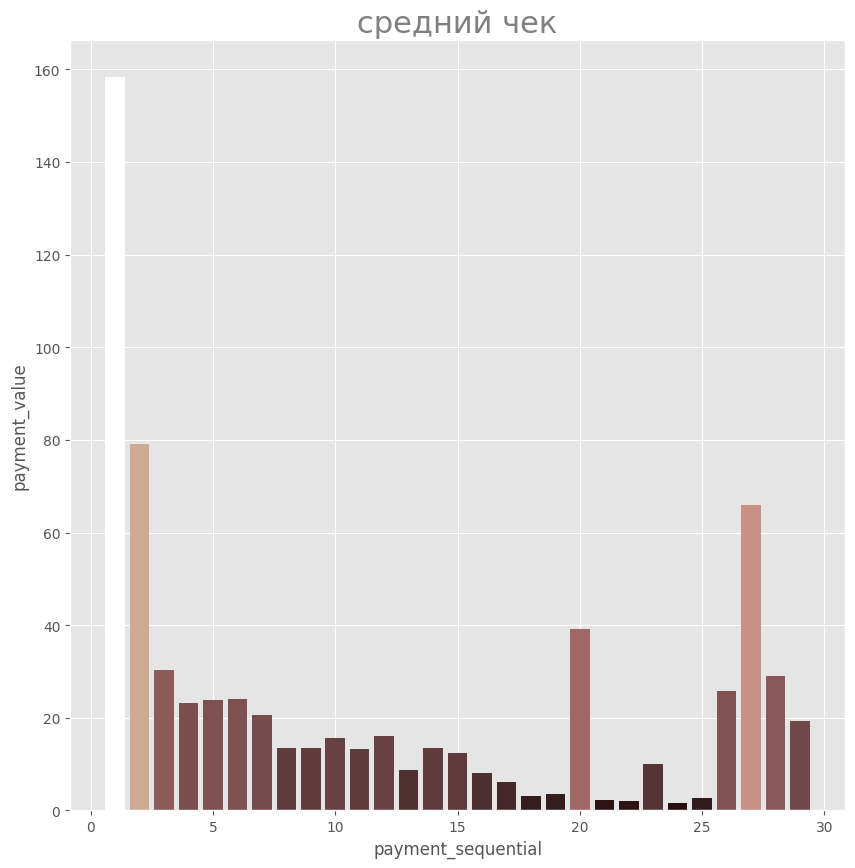

In [136]:
#Дело осталось на малым - сделать последнюю часть
payments_check=payments.groupby('payment_sequential')['payment_value'].mean().reset_index()
#да, мне настолько лень
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Если мне будет не лень, то я наведу красоту
ax.bar(payments_check["payment_sequential"], payments_check["payment_value"], color=plt.cm.pink(payments_check['payment_value'] / max(payments_check['payment_value'])))
ax.set_title('средний чек', fontsize=22, color="gray" )
ax.set_xlabel('payment_sequential')
ax.set_ylabel('payment_value')


## Задание 4 (15 баллов)

Визуализируйте зависимость между ценой заказа и ценой доставки по штатам покупки. Есть ли какая-нибудь зависимость и как вы можете ее обосновать?

In [40]:
merged_data=pd.merge(items,orders)
merged_data=pd.merge(merged_data,customers)
merged_data=pd.merge(merged_data,sellers)

merged_data['payment_value']=merged_data['price']+merged_data['freight_value']
merged_data['delivery_proportion']=merged_data['freight_value']/merged_data['payment_value'] #зависимость между ценой заказа и ценой доставки
merged_data

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,payment_value,delivery_proportion
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,27277,volta redonda,SP,72.19,0.184098
1,0188777fe321843a18be24a6e9aa1e53,1,436c8d57ff8d4aa254318e9bd9b48c83,48436dade18ac8b2bce089ec2a041202,2017-07-31 14:35:11,55.90,9.94,dc573d2a61a467e5e2826c1729691859,delivered,2017-07-23 16:13:37,...,2017-08-08 00:00:00,f81c042ed0162a51b90372c233b4fbad,25240,duque de caxias,RJ,27277,volta redonda,SP,65.84,0.150972
2,0191bbb5166d4b9a68df11797d5acfa9,1,ec02a5d380128f7a188e9ce8f3ddd832,48436dade18ac8b2bce089ec2a041202,2017-08-16 12:30:15,132.90,20.17,62b59a64eb786a96516229b7f3612c72,delivered,2017-08-10 12:17:35,...,2017-09-08 00:00:00,921fa6982e780da7d9e0bb6ca11b380c,93010,sao leopoldo,RS,27277,volta redonda,SP,153.07,0.131770
3,03054d8a8eefc2981cfad06f58e27979,1,3e31fd1419cc4cd6adad1925e72e3a03,48436dade18ac8b2bce089ec2a041202,2017-10-09 10:35:11,58.90,15.16,9bd2f246e81c19f65c539ce426288ef5,delivered,2017-10-02 10:25:22,...,2017-10-25 00:00:00,d46eb9ba6d6b75c1dac85b91911fc9c2,3560,sao paulo,SP,27277,volta redonda,SP,74.06,0.204699
4,0c325ea6925de749e1420be0cf43587c,1,3a135477bf41350a0b1d8afdf616d446,48436dade18ac8b2bce089ec2a041202,2017-07-06 15:43:50,139.90,16.74,e03505278b34146e87c0b4eb41e4f082,delivered,2017-07-01 15:27:23,...,2017-07-25 00:00:00,c082f4437360e3466068035e94a3345b,18540,porto feliz,SP,27277,volta redonda,SP,156.64,0.106869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fdfeec75aa07c1d2a88b17b8fbfc7b8f,1,11059273f4bc1a293777e98c89807c62,dbc51f5e45d654ecc16cb68e6817ecea,2017-03-01 22:42:22,199.99,18.14,8fbd29638b8ddd97d012473abf1f7752,delivered,2017-02-24 22:28:55,...,2017-03-21 00:00:00,4d34eb7a11a201d8a2317a791adbcb29,23812,itaguai,RJ,14402,franca,SP,218.13,0.083161
112646,fe68b52db13993f58175fa589125d345,1,f4135cbdece8245560f7be179533797a,3fefda3299e6dfaea3466ef346a3571a,2017-08-17 02:55:27,209.00,16.21,94203a446c1b46b5ac95b0aaf7221804,delivered,2017-08-11 10:15:22,...,2017-09-04 00:00:00,52a953541861bbb4b79b39df24e00243,13485,limeira,SP,82620,curitiba,PR,225.21,0.071977
112647,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,f48d464a0baaea338cb25f816991ab1f,delivered,2018-07-25 18:10:17,...,2018-08-10 00:00:00,459bef486812aa25204be022145caa62,29066,vitoria,ES,86026,londrina,PR,6922.21,0.027912
112648,ff701a7c869ad21de22a6994237c8a00,1,5ff4076c0f01eeba4f728c9e3fa2653c,3e35a8bb43569389d3cebef0ce820f69,2018-04-18 20:10:33,27.90,14.44,8f6d16c31abb30b7b4650272cb0014a3,delivered,2018-04-12 19:47:40,...,2018-04-30 00:00:00,ddb2249e0316d365ceae561c0f011bce,12280,cacapava,SP,3124,sao paulo,SP,42.34,0.341049


Text(0, 0.5, 'payment_value')

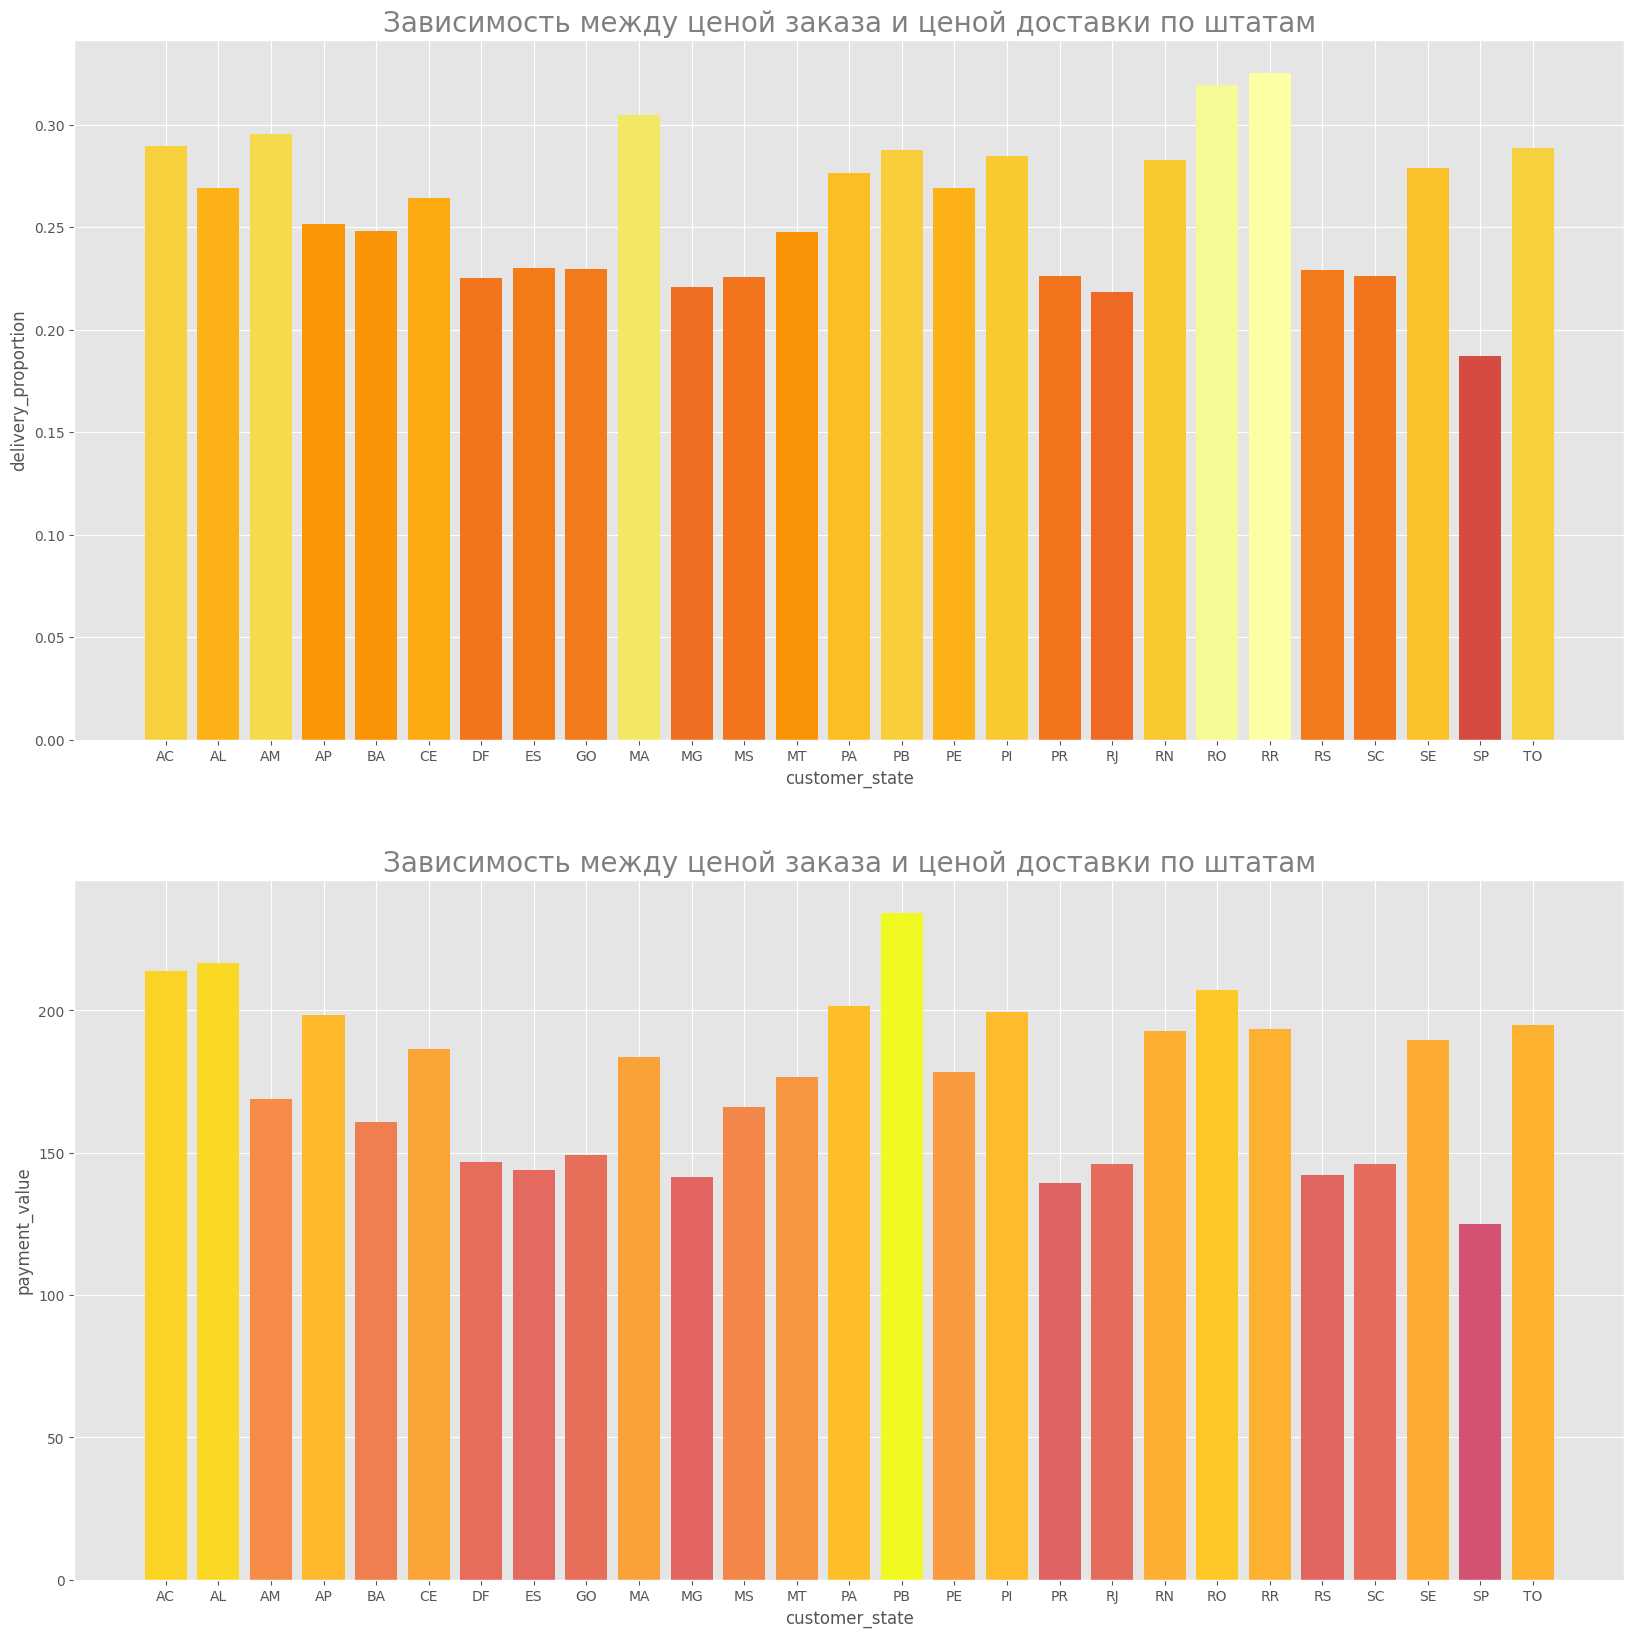

In [137]:
# Ну вроде просто и мы похожее делали в дз
merged_data=pd.merge(items[['order_id','price','freight_value']],orders[['order_id','customer_id']])
merged_data=pd.merge(merged_data,customers[['customer_id','customer_state']])

merged_data['payment_value']=merged_data['price']+merged_data['freight_value']
merged_data['delivery_proportion']=merged_data['freight_value']/merged_data['payment_value'] #зависимость между ценой заказа и ценой доставки

merged_data_1 = merged_data.groupby('customer_state')['delivery_proportion'].mean().reset_index()
merged_data_2 = merged_data.groupby('customer_state')['payment_value'].mean().reset_index()
# merged_data_1 = merged_data_1.sort_values('delivery_proportion')
# merged_data_2 = merged_data_2.sort_values('payment_value')

#да, мне настолько лень
fig, ax = plt.subplots(2, 1, figsize=(20, 20))

# Если мне будет не лень, то я наведу красоту
ax[0].bar(merged_data_1["customer_state"], merged_data_1["delivery_proportion"], color=plt.cm.inferno(merged_data_1['delivery_proportion'] / max(merged_data_1['delivery_proportion'])))
ax[0].set_title('Зависимость между ценой заказа и ценой доставки по штатам', fontsize=20, color="gray")
ax[0].set_xlabel('customer_state')
ax[0].set_ylabel('delivery_proportion' )

ax[1].bar(merged_data_2["customer_state"], merged_data_2["payment_value"], color=plt.cm.plasma(merged_data_2['payment_value'] / max(merged_data_2['payment_value'])))
ax[1].set_title('Зависимость между ценой заказа и ценой доставки по штатам',fontsize=20, color="gray")
ax[1].set_xlabel('customer_state')
ax[1].set_ylabel('payment_value')


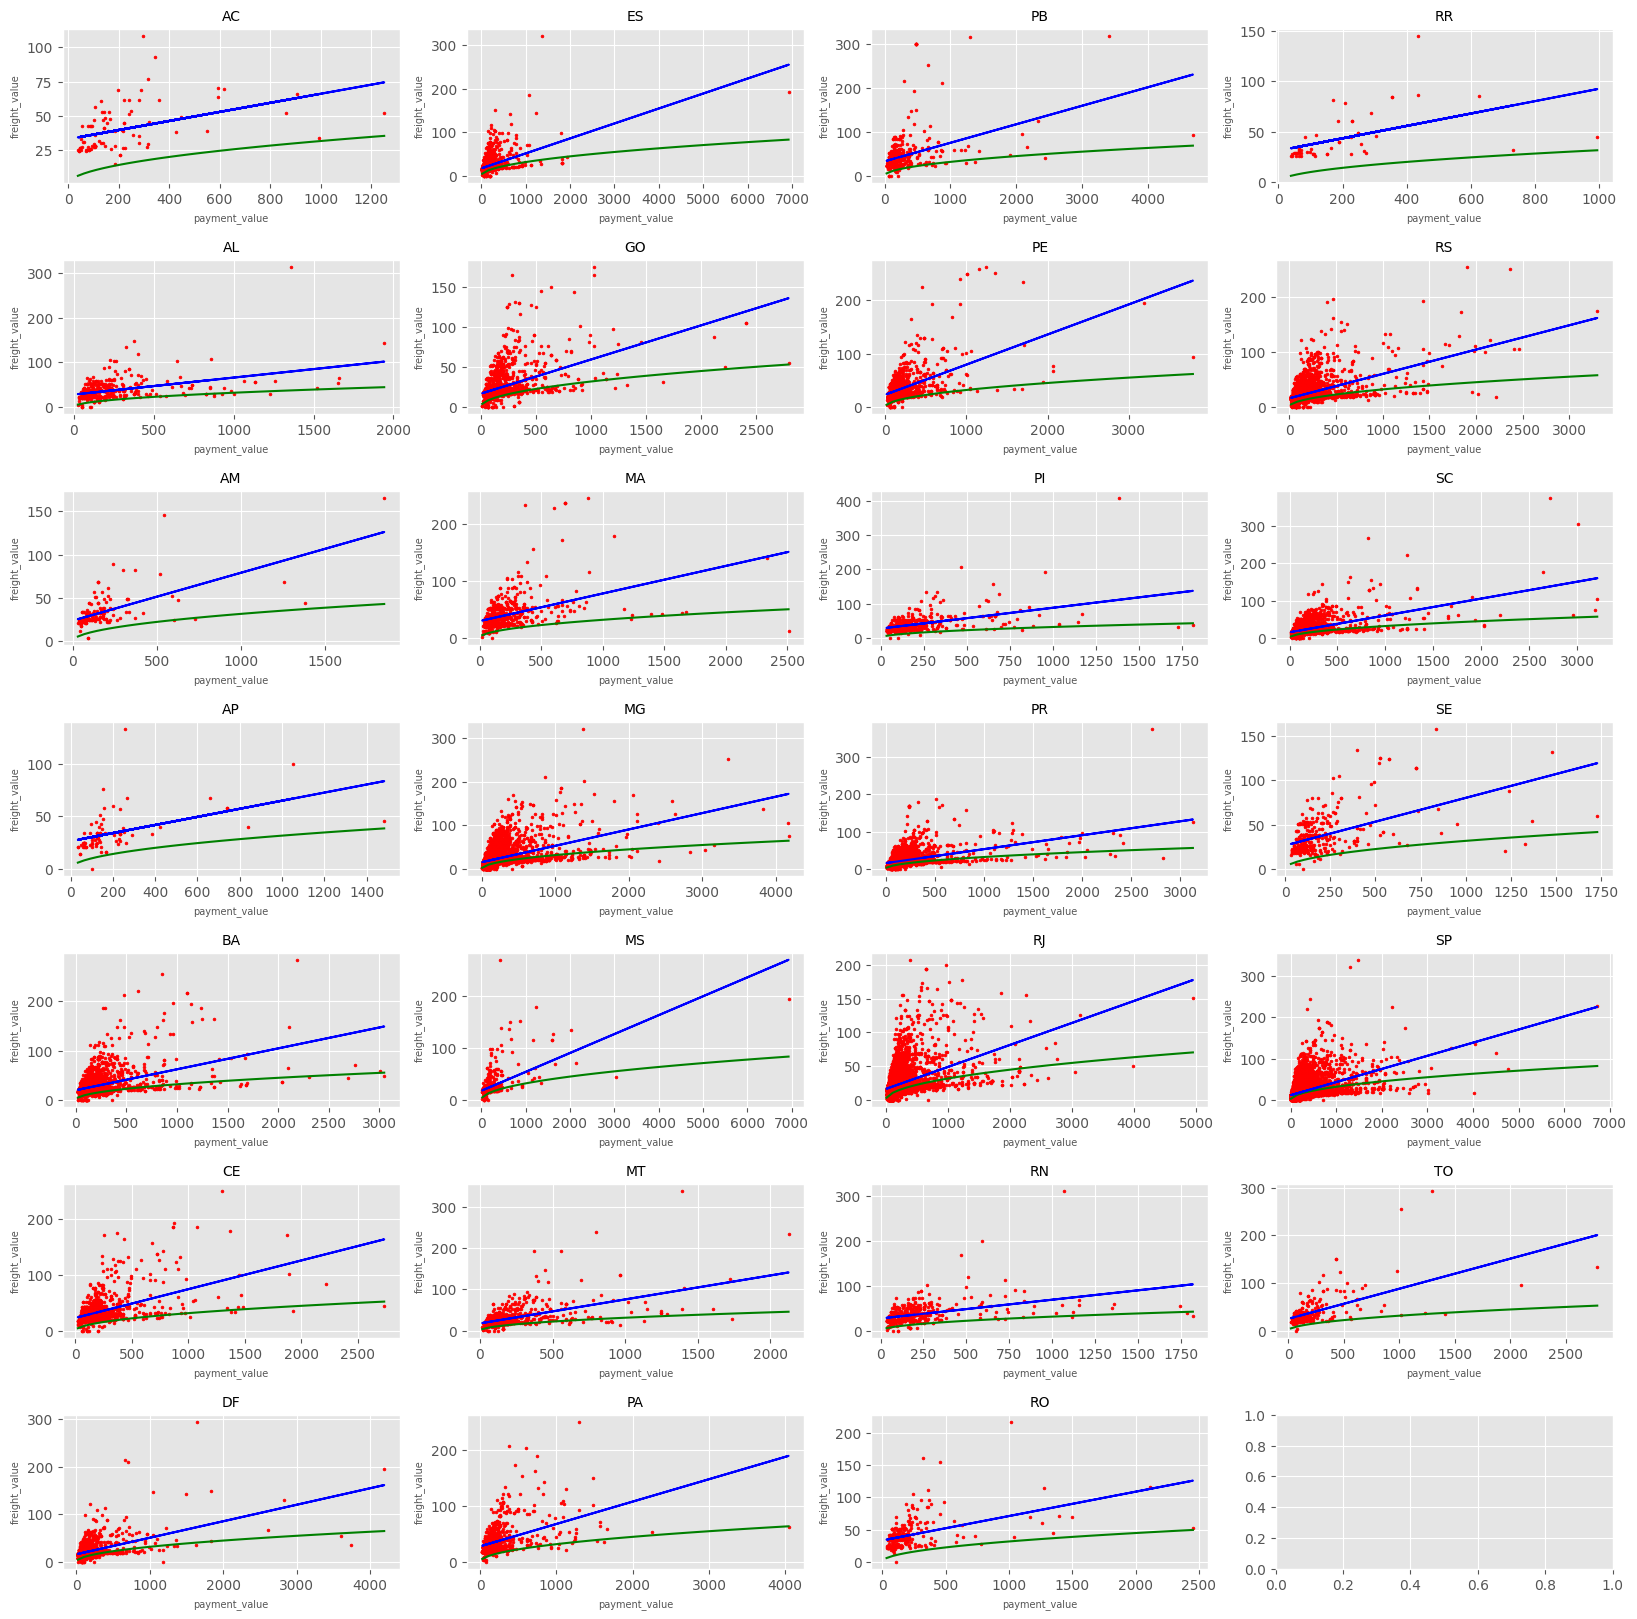

In [138]:
#фигня какая-то, давайте по-другому

fig, ax = plt.subplots(7, 4, figsize=(20, 20))
fig.subplots_adjust(hspace=0.5)
i=0
j=0
unique_states = merged_data.groupby('customer_state').size().index.tolist()

for state in unique_states:
    cons=merged_data[merged_data["customer_state"]==state].reset_index()

    a, b = np.polyfit(cons["payment_value"], cons["freight_value"], 1) #ебать мы конечно аналитики
    x=np.linspace(cons["payment_value"].min(),cons["payment_value"].max(), 50)
    y = np.sqrt(x)
    ax[i][j].plot(x, y, c='green', label="just_sqrt")
    ax[i][j].plot(cons["payment_value"], a*cons["payment_value"]+b, c='blue', label="linear_regression")
    ax[i][j].scatter(cons["payment_value"], cons["freight_value"], c='red', s=4, label="Scatter")

    ax[i][j].set_xlabel('payment_value', fontsize=7)
    ax[i][j].set_ylabel('freight_value', fontsize=7)
    ax[i][j].set_title(state, fontsize=10)

    i+=1
    if i==7:
        j+=1
        i=0

# Все равно фигня - я не понимаю какая здесь связь, при том, что я пробовал +- нормально анализировать
# Давайте подумаем что мы могли бы узнать отсюда - линейной функцией приближается довольно плохо - значит прямой зависимостью между стоимостью заказа и ценой доставки - нет
# с другой стороны доставка везде стоит до 100 в среднем, однако соотношение (из синих столбцов сверху) от 0.20 до 0.30, что по-человечески довольно много
# Можно было предложить что связь более сложная - например также зависит от места продавца, но из графа видно, что в крупных агломерация - Рио-де-Жанейро и Сан Паоло или очень населенных местах - RS - больше любят
# заказывать за недорого, но с дорогой доставкой


## Задание 5 (15 баллов)

Отобразите распределение оценок для заказов, которые были доставлены вовремя и которые пришли с опозданием. Насколько влияет факт опоздания на оценку? (оценки берутся из таблицы reviews)

In [47]:
reviews.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [49]:
orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [52]:
orders.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

Text(0, 0.5, 'order_id')

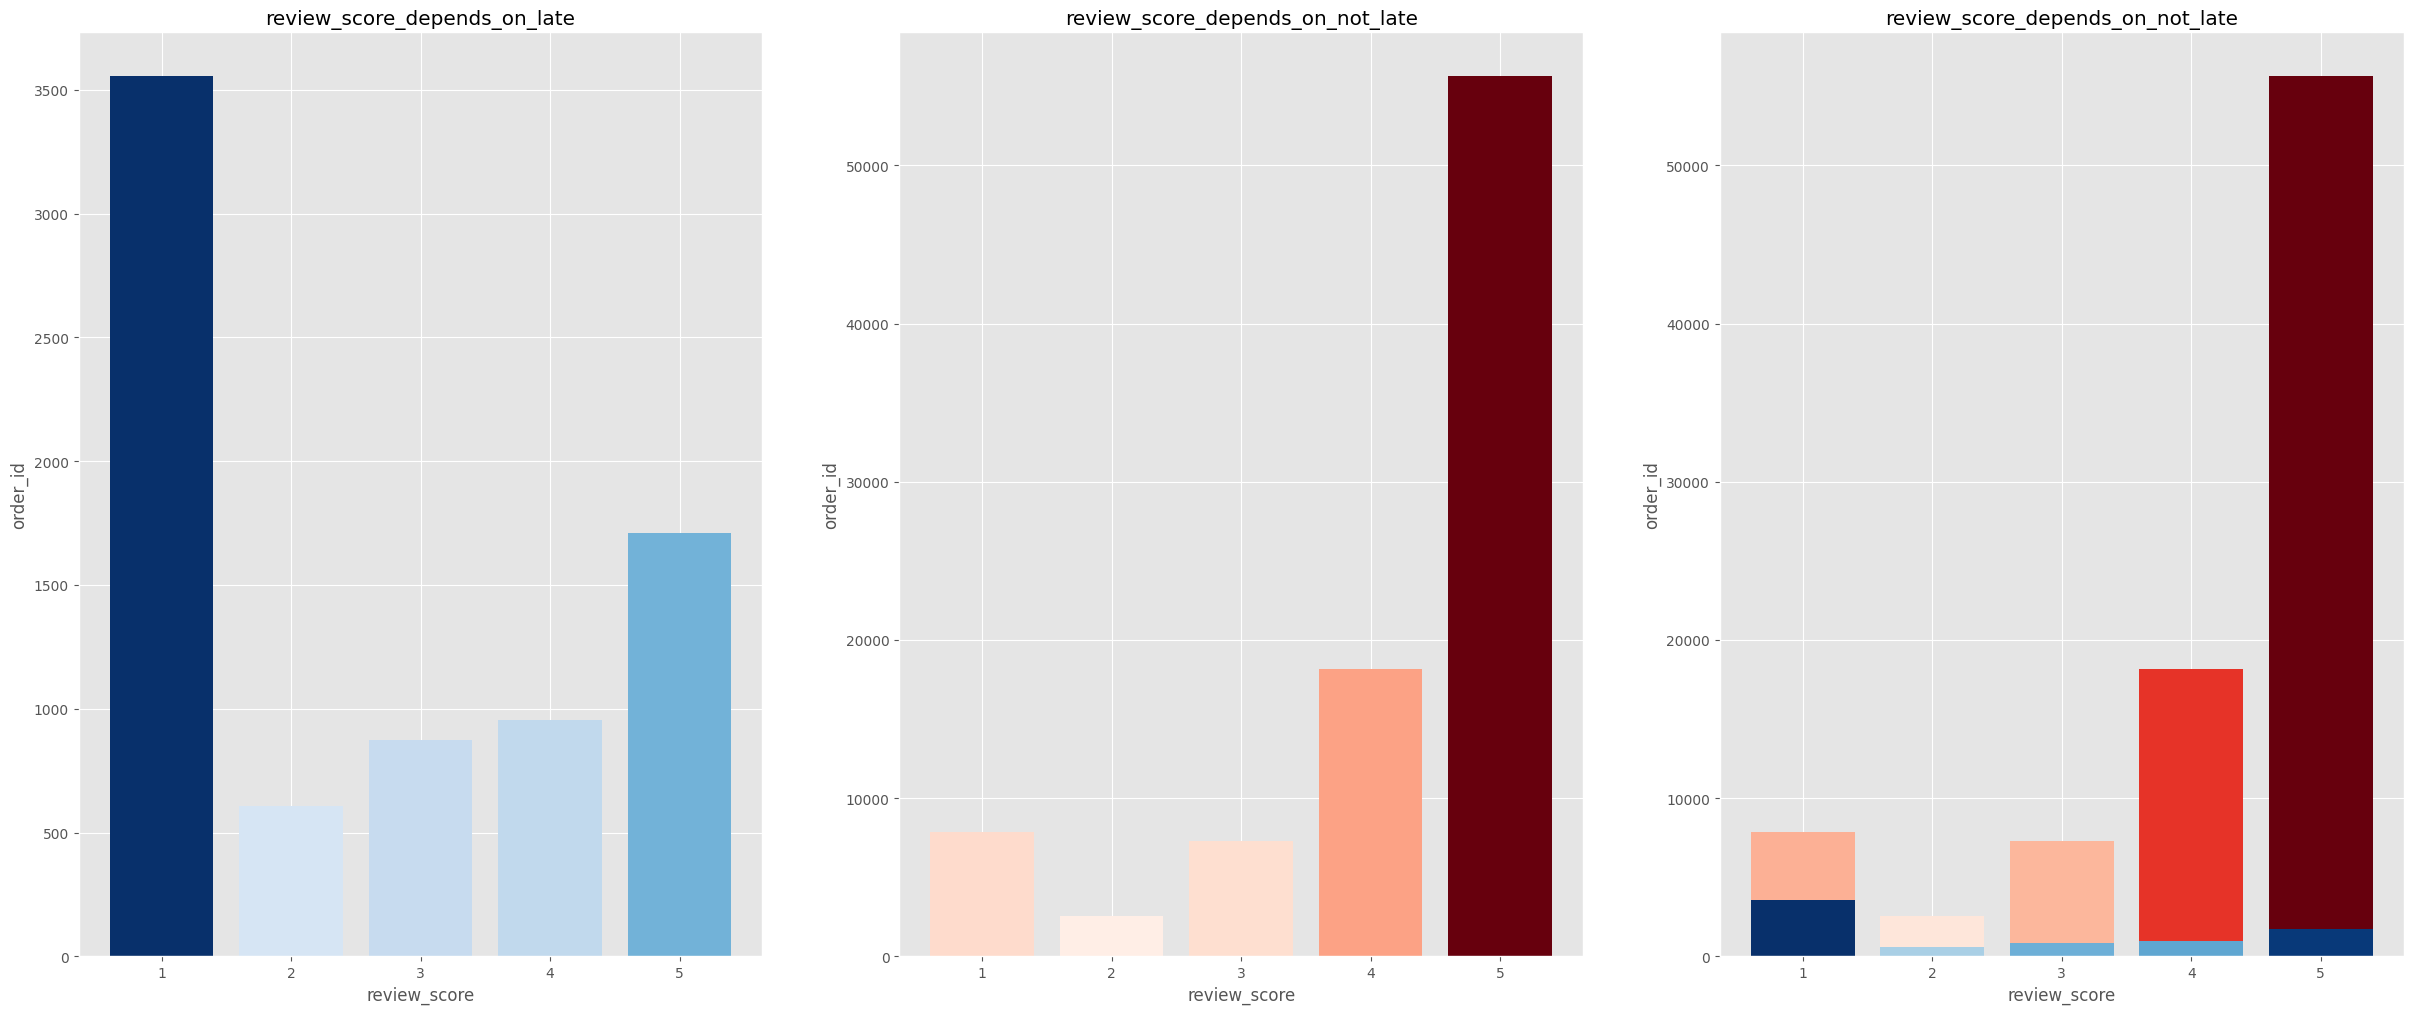

In [155]:
merged_data_reviews=pd.merge(
    reviews[["review_id","order_id", "review_score" ]],
    orders[["order_id", "order_status", 'order_delivered_customer_date', 'order_estimated_delivery_date']]) # когда-нибудь я погуглю что такое pep8 и начну хотя бы пытаться его соблюдать

merged_data_reviews['order_estimated_delivery_date'] = pd.to_datetime(merged_data_reviews['order_estimated_delivery_date'])
merged_data_reviews['order_delivered_customer_date'] = pd.to_datetime(merged_data_reviews['order_delivered_customer_date'])

merged_data_reviews['late'] = (merged_data_reviews['order_delivered_customer_date'] > merged_data_reviews['order_estimated_delivery_date'])
merged_data_review=merged_data_reviews.groupby(['review_score','late'])['order_id'].count().reset_index()

merged_data_late=merged_data_reviews[merged_data_reviews['late']==True]
merged_data_notlate=merged_data_reviews[merged_data_reviews['late']==False]
merged_data_late=merged_data_late.groupby(['review_score'])['order_id'].count().reset_index()
merged_data_notlate=merged_data_notlate.groupby(['review_score'])['order_id'].count().reset_index()

#да, мне настолько лень
fig, ax = plt.subplots(1, 3, figsize=(30, 12))
fig.subplots_adjust(hspace=0.5)

# Если мне будет не лень, то я наведу красоту
ax[0].bar(merged_data_late["review_score"], merged_data_late["order_id"], color=plt.cm.Blues(merged_data_late['order_id'] / max(merged_data_late['order_id'])))
ax[0].set_title('review_score_depends_on_late')
ax[0].set_xlabel('review_score')
ax[0].set_ylabel('order_id' )

ax[1].bar(merged_data_notlate["review_score"], merged_data_notlate["order_id"], color=plt.cm.Reds(merged_data_notlate['order_id'] / max(merged_data_notlate['order_id'])))
ax[1].set_title('review_score_depends_on_not_late')
ax[1].set_xlabel('review_score')
ax[1].set_ylabel('order_id' )

ax[2].bar(merged_data_notlate["review_score"], merged_data_notlate["order_id"], color=plt.cm.Reds(merged_data_notlate['order_id'] / max(merged_data_notlate['order_id'])*2))
ax[2].bar(merged_data_late["review_score"], merged_data_late["order_id"], color=plt.cm.Blues(merged_data_late['order_id'] / max(merged_data_late['order_id'])*2))
ax[2].set_title('review_score_depends_on_not_late')
ax[2].set_xlabel('review_score')
ax[2].set_ylabel('order_id' )

#вот такое я люблю - все понятно, если посылка опоздала - ставят единицу массово. В остальном похожее распредление на вторую таблицу

## Задание 6 (15 баллов)

Изобразите зависимость между ценой заказа и числом дней между покупкой и доставкой с разбивкой по признаку "есть заказ из другого штата". Есть ли зависимость?

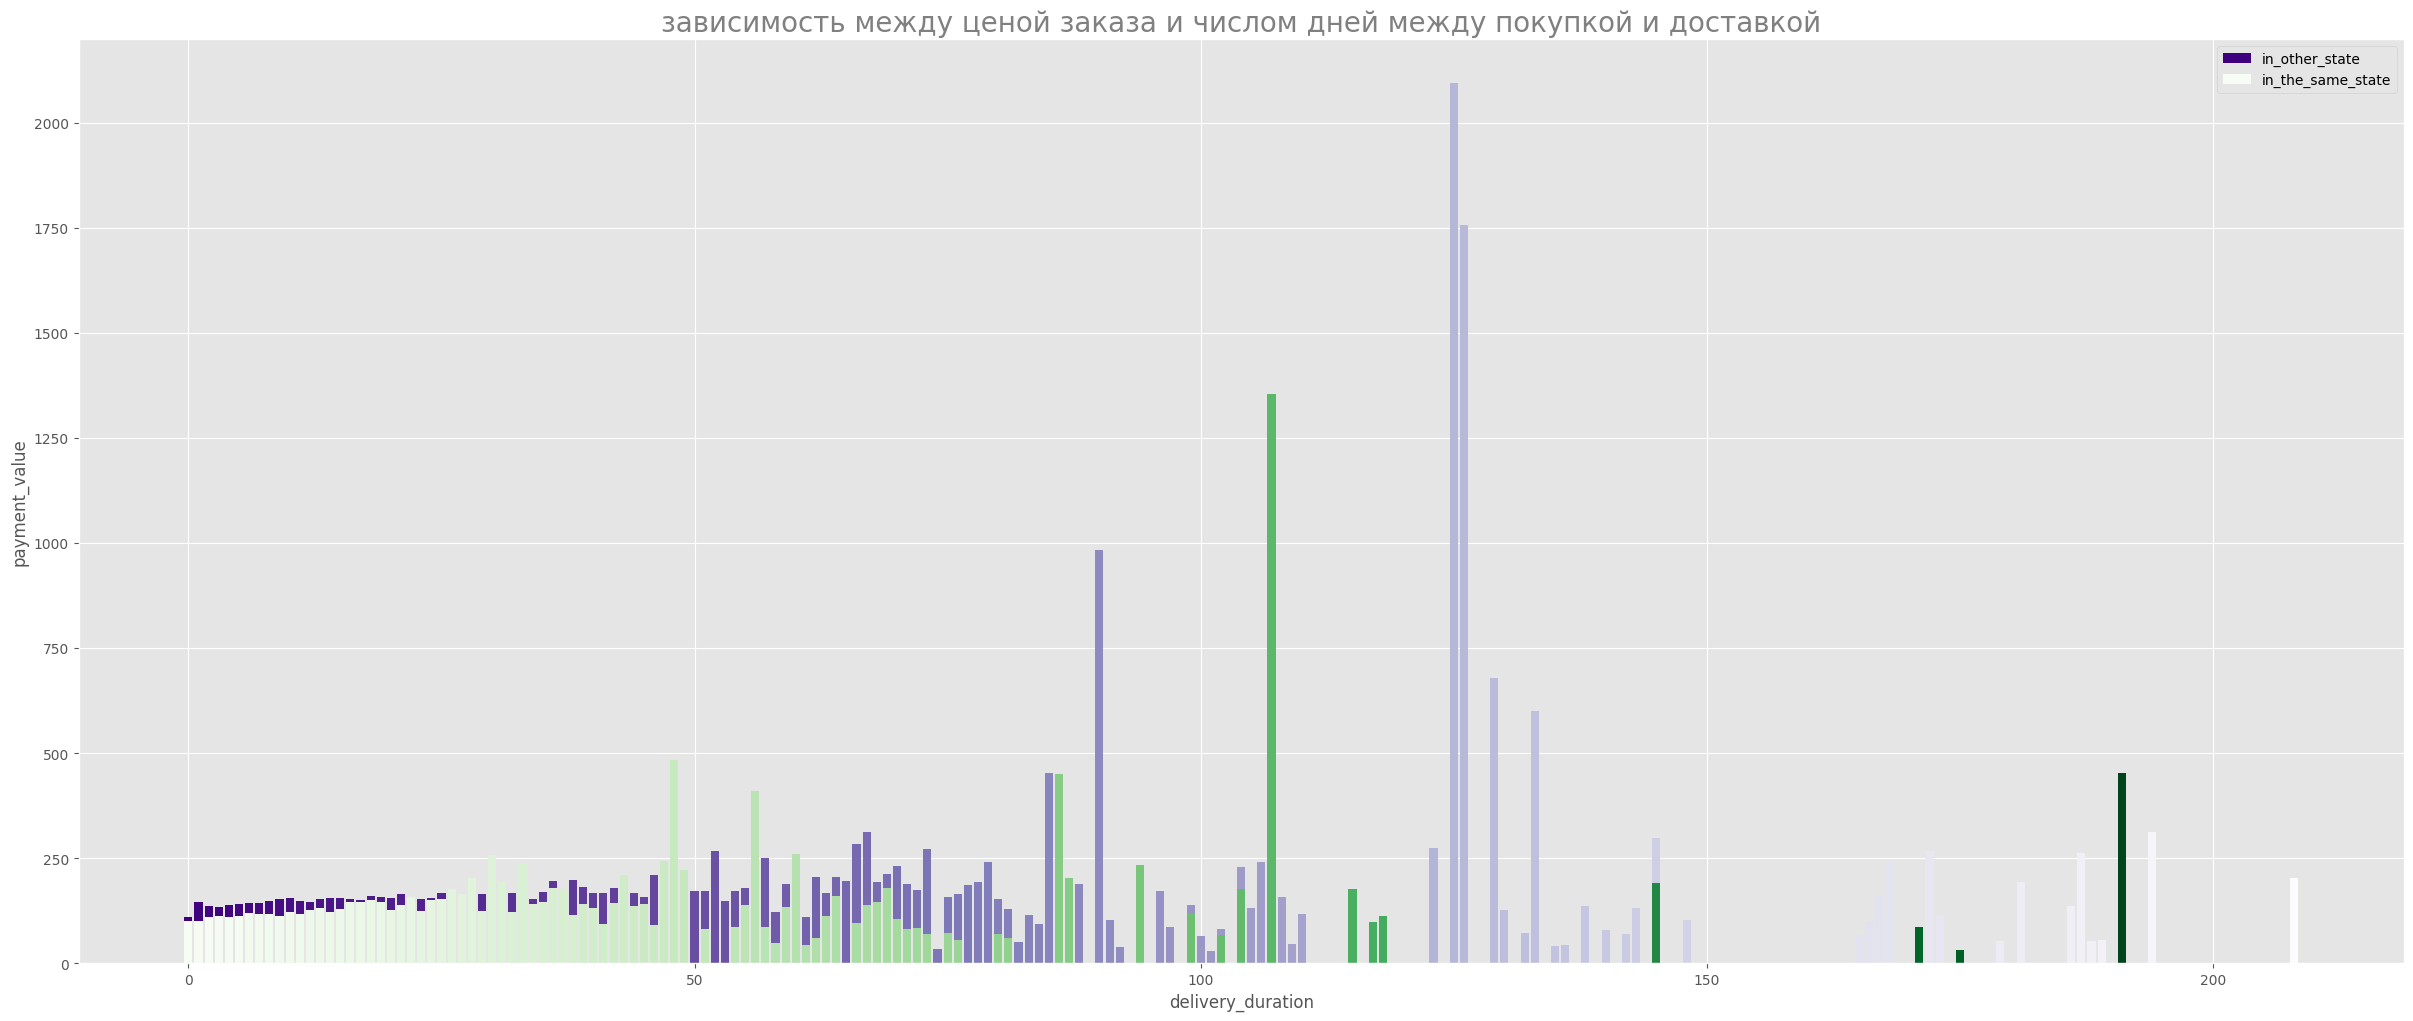

In [162]:
#Смерджим всё - а здесь нам много что пригодится
merged_data_customer_id=pd.merge(
    orders[['order_id', 'customer_id', 'order_approved_at', 'order_delivered_customer_date']],
    customers[['customer_id', 'customer_state']]
)
merged_data_seller_id=pd.merge(
    sellers[['seller_id', 'seller_state']],
    items[['order_id', 'seller_id', 'price', 'freight_value']]
)

merged_data_days=pd.merge(
    merged_data_customer_id,
    merged_data_seller_id
)

merged_data_days['order_approved_at'] = pd.to_datetime(another_state_days['order_approved_at'])
merged_data_days['order_delivered_customer_date'] = pd.to_datetime(another_state_days['order_delivered_customer_date'])

merged_data_days['payment_value'] = merged_data_days['price'] + merged_data_days['freight_value'] # 2 новых столбца по условию
merged_data_days['in_other_state'] = (merged_data_days['customer_state'] != merged_data_days['seller_state'])


merged_data_days['delivery_duration'] = (merged_data_days['order_delivered_customer_date'] - merged_data_days['order_approved_at']).dt.days

merged_data_days = merged_data_days.groupby(['delivery_duration', 'in_other_state'])['payment_value'].mean().reset_index()

merged_data_days_os = merged_data_days[merged_data_days['in_other_state'] == True]
merged_data_days_nos = merged_data_days[merged_data_days['in_other_state'] == False]


#да, мне настолько лень
fig, ax = plt.subplots(1, 1, figsize=(30, 12))

# Если мне будет не лень, то я наведу красоту
ax.bar(merged_data_days_os['delivery_duration'], merged_data_days_os['payment_value'], color=plt.cm.Purples_r(merged_data_days_os['delivery_duration'] / max(merged_data_days_os['delivery_duration'])), label='in_other_state' )
ax.bar(merged_data_days_nos['delivery_duration'], merged_data_days_nos['payment_value'], color=plt.cm.Greens(merged_data_days_nos['delivery_duration'] / max(merged_data_days_nos['delivery_duration'])), label='in_the_same_state')
ax.set_title('зависимость между ценой заказа и числом дней между покупкой и доставкой', fontsize=20, color="gray")
ax.set_xlabel('delivery_duration')
ax.set_ylabel('payment_value' )
ax.legend()
